In [3]:
# import tensorflow & tf.keras
import tensorflow as tf
from tensorflow import keras

In [4]:
# numpy & matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.4.0


In [6]:
#Import Fashon MNIST ; This is good to test algorithm because the data set is quite small
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
# label : 0 ~ 9 (10 classes)
# Eash image is mapped to one class label
# Because there are not class names, make a list for class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

In [8]:
# Explore dataset
print(train_images.shape)

# Labels are integers 0~9
print(set(train_labels))

(60000, 28, 28)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
# Data preprocessing
# Scaling
train_images = train_images/255.0
test_images = test_images/255.0

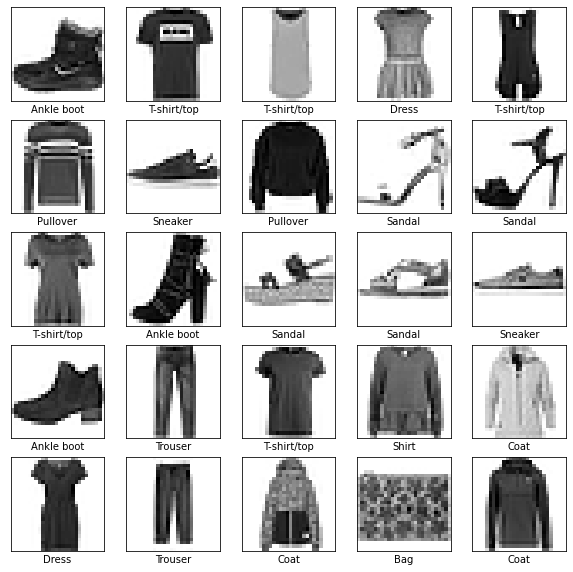

In [10]:
# plot first 25 images and class name
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1) # will be arranged by 5X5
  # hide ticks
  plt.xticks([])
  plt.yticks([])
  # remove grid
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [11]:
# Set up layers
# Layers are the basic building blocks

model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),  # (28, 28) -> (1, 784)
      tf.keras.layers.Dense(128, activation='relu'), # (check later : # of param - (784+1)*128=100480)
      tf.keras.layers.Dense(10)  # param : (128+1)*10 = 1290
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6248 - accuracy: 0.7827
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3852 - accuracy: 0.8609
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3411 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3098 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2999 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2795 - accuracy: 0.8989
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2553 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2456 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [15]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# verbose =0 ; show nothing
# verbose =1 ; show an animated progress bar like [================================]
# verbose =2 ; will mension the number of epoch

313/313 - 0s - loss: 0.3463 - accuracy: 0.8788


In [16]:
# Make predictions
# with the model trained, you can use it to make predictions about some images

# logit = linear out of model
# with softmax function, we can change logit to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([2.4969074e-07, 6.4957376e-08, 3.4600370e-07, 1.4041503e-07,
       1.4609920e-07, 1.9020794e-02, 2.0573683e-05, 6.9447905e-02,
       1.3020916e-05, 9.1149670e-01], dtype=float32)

In [19]:
# predicted label is the index of array that have a maximum probability
np.argmax(predictions[0])

9

In [20]:
# true label
test_labels[0]

9

In [21]:
# to plot images
def plot_image(i, predictions_array, true_label,img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel('{} {:2.0f}% {}'.format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

In [28]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  barplot = plt.bar(range(10), predictions_array, color='#777777')
  #print(barplot)
  #print('barplot[1]', barplot[1])

  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  #print('barplot[predicted_label]', barplot[predicted_label])
  barplot[predicted_label].set_color('red')
  #print('barplot[predicted_label]', barplot[predicted_label])
  barplot[true_label].set_color('blue')

<BarContainer object of 10 artists>
barplot[1] Rectangle(xy=(0.6, 0), width=0.8, height=6.49574e-08, angle=0)
barplot[predicted_label] Rectangle(xy=(8.6, 0), width=0.8, height=0.911497, angle=0)
barplot[predicted_label] Rectangle(xy=(8.6, 0), width=0.8, height=0.911497, angle=0)


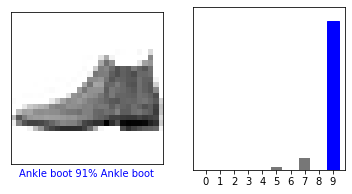

In [23]:
# verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

<BarContainer object of 10 artists>
barplot[1] Rectangle(xy=(0.6, 0), width=0.8, height=1.33212e-10, angle=0)
barplot[predicted_label] Rectangle(xy=(4.6, 0), width=0.8, height=0.999716, angle=0)
barplot[predicted_label] Rectangle(xy=(4.6, 0), width=0.8, height=0.999716, angle=0)


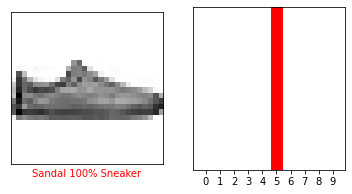

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

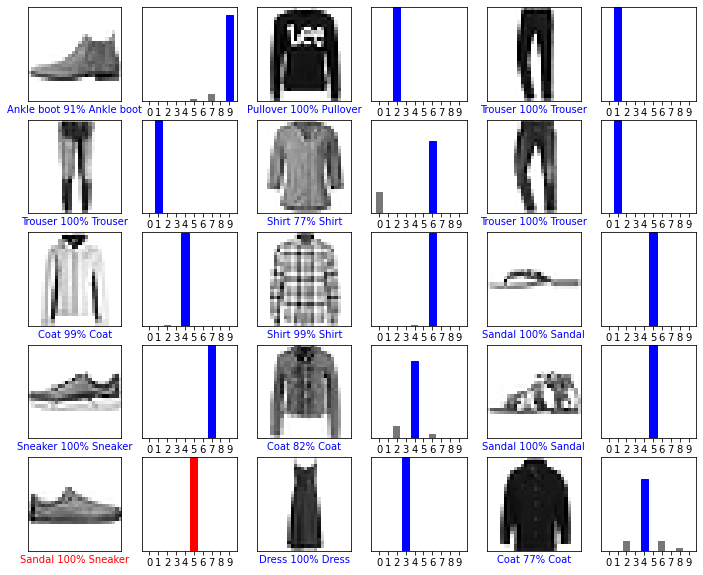

In [29]:
# plot several images
num_rows = 5
num_cols = 3

num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, num_cols*2, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, num_cols*2, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.show()


In [30]:
# Use trained model
# To make a prediction about a single image

# take one test example
one_img = test_images[1]
print(one_img.shape)

(28, 28)


In [33]:
# ADd the image to a batch where it is the only element
# at position 0, one dimension will be added

batch_img = np.expand_dims(one_img,0)
print(batch_img.shape)

(1, 28, 28)


In [34]:
predictions_one_sample = probability_model.predict(batch_img)
print(predictions_one_sample)

[[5.6398309e-05 9.0138230e-11 9.9834776e-01 4.8015558e-10 8.4780843e-04
  3.3929668e-11 7.4796466e-04 6.5661405e-14 2.9476906e-08 4.4464629e-16]]


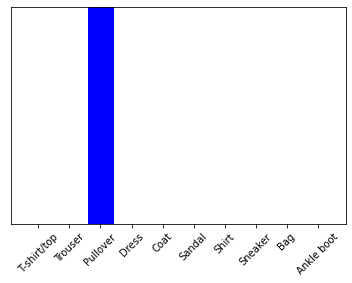

In [37]:
plot_value_array(1, predictions_one_sample[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()